# An Analysis of Four Decades of Movie Data
The movie industry is an industry that many people have claimed to be on a downward trend the past few years. There is a high risk for filmmakers to invest and create a story for a movie that has no guarantee to sell well. There is also increased competition from other streaming services such as Netflix. I will be looking at a dataset that includes the top 200 movies by popularity per year from the years 1980-2020 to identify any factors that contribute to a successful movie.


In [2]:
#Import Libraries

import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
import math

In [3]:
#Read Data Source

df_movie = pd.read_csv('movies.csv')
print(df_movie.describe())
print(df_movie.info())

              year        score         votes        budget         gross  \
count  7668.000000  7665.000000  7.665000e+03  5.497000e+03  7.479000e+03   
mean   2000.405451     6.390411  8.810850e+04  3.558988e+07  7.850054e+07   
std      11.153508     0.968842  1.633238e+05  4.145730e+07  1.657251e+08   
min    1980.000000     1.900000  7.000000e+00  3.000000e+03  3.090000e+02   
25%    1991.000000     5.800000  9.100000e+03  1.000000e+07  4.532056e+06   
50%    2000.000000     6.500000  3.300000e+04  2.050000e+07  2.020576e+07   
75%    2010.000000     7.100000  9.300000e+04  4.500000e+07  7.601669e+07   
max    2020.000000     9.300000  2.400000e+06  3.560000e+08  2.847246e+09   

           runtime  
count  7664.000000  
mean    107.261613  
std      18.581247  
min      55.000000  
25%      95.000000  
50%     104.000000  
75%     116.000000  
max     366.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Colum

## Type of Content

To begin the analysis, I will start off by looking at the type of movies that are being produced.

- What was the most common rating of movies being produced from 1980 - 2020?
- What was the most common genre?

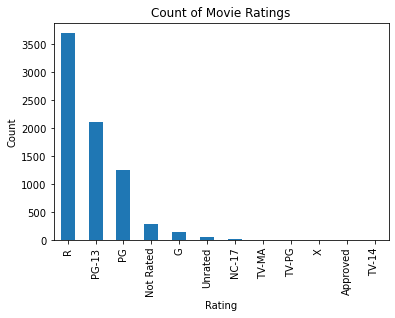

In [33]:
rating_movie = df_movie['rating']
rating_movie_sorted = rating_movie.value_counts(sort=True)
rating_movie_sorted.plot(kind='bar')
plt.title('Count of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

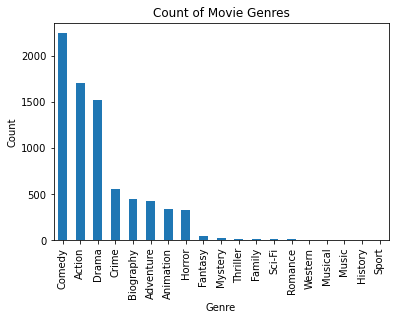

In [34]:
genre_movie= df_movie['genre']
genre_movie_sorted = genre_movie.value_counts(sort=True)
genre_movie_sorted.plot(kind='bar')
plt.title('Count of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

## Further Analysis on Top Rating and Genre Categories

Our graphs show that Comedy, Action, and Drama are the genres with the most movies. The most common ratings are R, PG-13, and PG. Let's further analyze the average revenue that each of these categories receive to see the popularity with the consumers.

C:\Users\Aleck\AppData\Local\Temp/ipykernel_1244/236350885.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


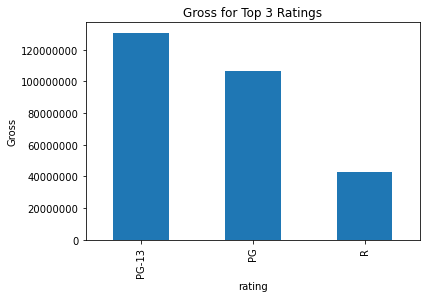

In [35]:
condition1 = df_movie['rating'] == 'R'
condition2 = df_movie['rating'] == 'PG-13'
condition3 = df_movie['rating'] == 'PG'
top3_rating = df_movie[condition1|condition2|condition3]
avg_gross_by_rating = top3_rating.groupby('rating')['gross'].mean().sort_values(ascending=False)
avg_gross_by_rating.plot(kind="bar")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.title('Gross for Top 3 Ratings')
plt.ylabel('Gross')
plt.show()


C:\Users\Aleck\AppData\Local\Temp/ipykernel_1244/4197138090.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


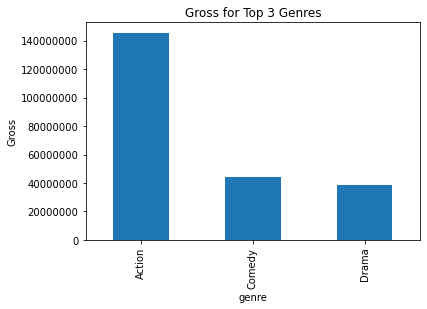

In [36]:
genre_condition1 = df_movie['genre'] == 'Comedy'
genre_condition2 = df_movie['genre'] == 'Action'
genre_condition3 = df_movie['genre'] == 'Drama'
top3_genre = df_movie[genre_condition1|genre_condition2|genre_condition3]
avg_gross_by_genre = top3_genre.groupby('genre')['gross'].mean().sort_values(ascending=False)
avg_gross_by_genre.plot(kind="bar")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.title('Gross for Top 3 Genres')
plt.ylabel('Gross')
plt.show()

## Impact of Quality of the Movie on Gross Revenue

Our data shows that Action and PG-13 seem to average higher revenue than other categories. Let's examine the score of the movies and see if the quality of a movie affects it's revenue.

In [25]:
scores = df_movie['score']
#print(scores)

freq = {}
for i in scores:
  freq[i] = freq.get(i, 0) + 1
    
#print(freq)


gross_num = df_movie['gross']
sum = {}

for i in range(0,len(scores)):
  sum[scores[i]] = sum.get(scores[i], 0) + gross_num[i]
  #print(gross_num[i])
#print(sum)

avg = {}
for i in freq:
  if not math.isnan(i) and not math.isnan(sum[i]):
      avg[i] = sum[i]/freq[i]

sort = dict(sorted(avg.items(), key=lambda item: item[1],reverse=True))

for r in sort:
    print(r, sort[r])
    




9.0 1005973645.0
8.8 628490718.5
8.9 560706973.0
8.4 534271731.1
8.7 499799571.0
8.6 327346612.1111111
8.5 235552545.33333334
8.0 187945852.7682927
3.3 102761833.25
2.8 85823313.5
2.4 49965901.5
3.4 30611638.888888888
9.3 28817291.0
4.4 26424038.09375
3.9 23914495.14285714
2.5 23780467.25
3.5 23068872.1
2.2 17986533.75
1.9 15287233.333333334
3.0 13738938.5
3.2 13023072.5
2.1 9373532.0
2.7 9241213.8
2.3 5271666.0
2.6 1576615.0


As expected, the top 7 highest average gross revenues belong to movies that have above an 8.4 score. This shows that the quality of a movie can definitely have a big effect on the gross revenue. Let's take a deeper look at these movies to see if we can identify the factors that have the biggest effect on the score.

In [7]:
highscore1 = df_movie['score'] == 9.0
highscore2 = df_movie['score'] == 8.8
highscore3 = df_movie['score'] == 8.9
highscore4 = df_movie['score'] == 8.4
highscore5 = df_movie['score'] == 8.7
highscore6 = df_movie['score'] == 8.6
highscore7 = df_movie['score'] == 8.5

filtered_highscore = df_movie[highscore1|highscore2|highscore3|highscore4|highscore5|highscore6|highscore7]
filtered_highscore[['name','genre','rating','director','writer','star','gross']]

,name,genre,rating,director,writer,star,gross
0,The Shining,Drama,R,Stanley Kubrick,Stephen King,Jack Nicholson,4.699877e+07
2,Star Wars: Episode V - The Empire Strikes Back,Action,PG,Irvin Kershner,Leigh Brackett,Mark Hamill,5.383751e+08
92,Indiana Jones and the Raiders of the Lost Ark,Action,PG,Steven Spielberg,Lawrence Kasdan,Harrison Ford,3.899260e+08
479,Once Upon a Time in America,Crime,R,Sergio Leone,Harry Grey,Robert De Niro,5.473212e+06
645,Back to the Future,Adventure,PG,Robert Zemeckis,Robert Zemeckis,Michael J. Fox,3.819068e+08
1257,Cinema Paradiso,Drama,PG,Giuseppe Tornatore,Giuseppe Tornatore,Philippe Noiret,1.301906e+07
1643,Goodfellas,Biography,R,Martin Scorsese,Nicholas Pileggi,Robert De Niro,4.696328e+07
1843,Terminator 2: Judgment Day,Action,R,James Cameron,James Cameron,Arnold Schwarzenegger,5.208812e+08
1845,The Silence of the Lambs,Crime,R,Jonathan Demme,Thomas Harris,Jodie Foster,2.727429e+08
2247,Schindler's List,Biography,R,Steven Spielberg,Thomas Keneally,Liam Neeson,3.221612e+08


In [8]:
print(filtered_highscore['genre'].value_counts())
print(filtered_highscore['rating'].value_counts())
print(filtered_highscore['director'].value_counts())
print(filtered_highscore['writer'].value_counts())
print(filtered_highscore['star'].value_counts())

Action       17
Drama        13
Crime         9
Animation     7
Biography     4
Comedy        3
Adventure     2
Mystery       1
Name: genre, dtype: int64
R            29
PG-13        14
PG            8
G             2
Not Rated     2
TV-PG         1
Name: rating, dtype: int64
Christopher Nolan                   6
Steven Spielberg                    3
Peter Jackson                       3
Anthony Russo                       2
Hayao Miyazaki                      2
Quentin Tarantino                   2
David Fincher                       2
Robert Zemeckis                     2
Martin Scorsese                     2
Olivier Nakache                     1
Anurag Kashyap                      1
Todd Phillips                       1
Florian Henckel von Donnersmarck    1
Aamir Khan                          1
Andrew Stanton                      1
Rajkumar Hirani                     1
Bob Persichetti                     1
Damien Chazelle                     1
Makoto Shinkai                      1
P

The majority of the highest rated films are Action, Crime, and Drama. R is the most common rating with PG-13 second. There are directors and writers, such as the Nolan Brothers, with 6 appearances on this list, who consistently deliver movies with great storytelling. Another duo, Peter Jackson and J.R.R Tolkien, is responsible for the famous Lord of the Rings trilogy, showing that sequels have the potential to generate very high revenue. The star actors were more diverse with only Tom Hanks, Elijah Wood, and Christian Bale making 3 appearances. Elijah was part of the Lord of the Rings trilogy. Christian Bale was also part of Christopher Nolan's Batman Trilogy but also made an appearance in a Nolan movie that was not part of the trilogy.

## Number of Reviews, Budget, and Runtime

For the final part of the analysis, let's focus on the votes, budget, and runtime columns. Using the corr function, I will get the correlation values of each of these columns to the gross revenue to identify if there is a strong correlation.

In [21]:
#Correlation between votes and gross
df_movie['votes'].corr(df_movie['gross'])

0.6307565842742957

In [22]:
#correlation between budget and gross
df_movie['budget'].corr(df_movie['gross'])

0.7403948929894829

In [23]:
#correlation between runtime and gross
df_movie['runtime'].corr(df_movie['gross'])

0.24521613203808648

Out of these 3 variables, the only one that has a strong correlation to gross revenue is the budget. To look deeper into the budget, let's compare budget to the genre and the score as well. 

In [32]:
df_movie['score'].corr(df_movie['budget'])

0.0762540443254111

C:\Users\Aleck\AppData\Local\Temp/ipykernel_1244/2462762092.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


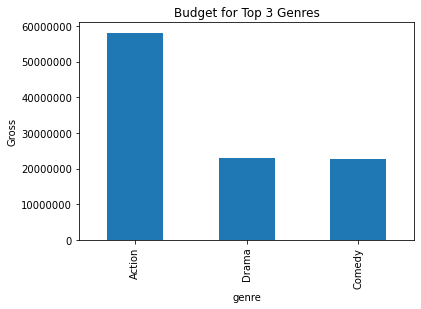

In [37]:
genre_condition1 = df_movie['genre'] == 'Comedy'
genre_condition2 = df_movie['genre'] == 'Action'
genre_condition3 = df_movie['genre'] == 'Drama'
top3_genre = df_movie[genre_condition1|genre_condition2|genre_condition3]
avg_budget_by_genre = top3_genre.groupby('genre')['budget'].mean().sort_values(ascending=False)
avg_budget_by_genre.plot(kind="bar")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.title('Budget for Top 3 Genres')
plt.ylabel('Gross')
plt.show()

C:\Users\Aleck\AppData\Local\Temp/ipykernel_17332/1509044225.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


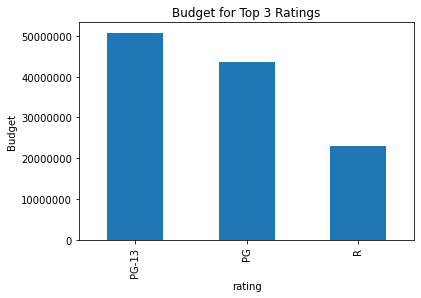

In [4]:
condition1 = df_movie['rating'] == 'R'
condition2 = df_movie['rating'] == 'PG-13'
condition3 = df_movie['rating'] == 'PG'
top3_rating = df_movie[condition1|condition2|condition3]
avg_budget_by_rating = top3_rating.groupby('rating')['budget'].mean().sort_values(ascending=False)
avg_budget_by_rating.plot(kind="bar")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.title('Budget for Top 3 Ratings')
plt.ylabel('Budget')
plt.show()


Similar to the genre and revenue graph, Action has the highest average budget. This shows that while Action has potential to generate the highest revenue, they also require more investment. When looking at the budget graph for ratings, this is also very similar to the gross graph for ratings with PG-13 first and R last. This supports the fact that there is a high correlation between budget and gross revenue generated for a movie.

# Summary

From this analysis of movie data from 1980-2020, we were able to determine that:

* The top 3 most common genres for movies produced were Comedy, Action, and Drama respectively.
* The top 3 most common ratings for movies produced were R, PG-13, and PG respectively. 
* Despite R rating being the most common rating, they had a lower average gross revenue compared to PG-13 and PG. PG-13 had the highest average gross revenue.
* For genres, Comedy had more movies compared to Action but Action's average gross revenue was 3x Comedy's average gross revenue
* This was true for the budget graph as well.
* Quality/Score has an impact on revenue generated as the majority of the highest grossing movies were highly rated.

# Analysis

* Focus on the Action genre. They are less common than Comedy movies while producing 3x the revenue that Comedy movies do on average. The majority of the highest grossing movies were also Action movies with 17 Action movies to 3 Comedy movies. They are more expensive budget wise but can be worth it for the return. Comedy movies seem to be very common but rarely perform well.
* Focus on the PG-13 rating category. R movies were the most common type of movies but had the lowest average gross revenue. Note that there were more R movies than PG-13 movies for the highest grossing movies list. Look at these as outliers as the majority of R movies tend to underperform. Invest in R rated movies if there is a well known director and writer.
* For optimal use of the budget, focus on investing in a well-known director working with a writer that has a well-written Action story. A R or PG-13 rating is preferred. The stars across the best movies were very diverse showing that there are many known actors that can perform the role well. Focus on the quality of the story before investing in an expensive star actor. Also, consider if the director and star already have a history of success working together, for example, Christopher Nolan and Christian Bale on the Dark Knight trilogy.